In [28]:
!pip3 install autoviml
!pip3 install graphviz
!pip3 install imbalanced-learn
!pip3 install keras
!pip3 install keras-cv
!pip3 install keras-nlp
!pip3 install lightgbm
!pip3 install matplotlib
!pip3 install nltk
!pip3 install numpy
!pip3 install pandas
!pip3 install scikit-learn
!pip3 install seaborn
!pip3 install wordcloud

  Using cached autoviml-0.1.716-py3-none-any.whl.metadata (13 kB)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached catboost-1.2.5-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached emoji-2.11.1-py2.py3-none-any.whl.metadata (5.3 kB)
  Using cached imbalanced_learn-0.12.2-py3-none-any.whl.metadata (8.2 kB)
  Using cached imbalanced_ensemble-0.2.1-py2.py3-none-any.whl.metadata (40 kB)
  Using cached jupyter-1.0.0-py2.py3-none-any.whl.metadata (995 bytes)
  Using cached numpy-1.19.5.zip (7.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached shap-0.45.0-cp311-cp311-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (24 kB)
  Using cached textblob-0.18.0.post0-py3-none-any.whl.metadata (4.5 kB)
  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata (572 bytes)
  Using cached

In [8]:
import graphviz
import imblearn
import nltk
import sklearn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfVectorizer,
    TfidfTransformer,
)
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    classification_report,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.tree import export_graphviz

from IPython.display import Image

nltk.download("all")


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/hady/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /home/hady/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/hady/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/hady/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/hady/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /home/hady/nltk_data...
[nltk_data]    |   Pack

True

In [9]:
stemmer = SnowballStemmer(language="english")
english_stopwords = stopwords.words("english")

replaced_stopwords = ["xx", "xxxx"]

contractions = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "this's": "this is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
}


def tokenize(text):
    return [stemmer.stem(token) for token in word_tokenize(text)]


def tokenizeWithoutPunctuation(text):
    return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]


def contr_to_exp(x):
    if type(x) is str:
        x = x.replace("\\", "")
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x


def get_top_ngram(corpus, n=None, wordscount=100):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
    return word_freq[0:wordscount]


def expand_contractions(text):
    for key in contractions:
        value = contractions[key]
        text = text.replace(key, value)
    return text


def stopwords_remove(text):
    result = [word for word in text.split() if not word in replaced_stopwords]
    return " ".join(result)


def zero_one_confusion_matrix(y_test, y_pred):
    cnf_matrix = confusion_matrix(y_test, y_pred)

    class_names = [0, 1]  # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))

    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title("Confusion matrix", y=1.1)
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")

READ

In [10]:
raw_df = pd.read_csv("./tmp/Customer_v2.csv")


CLEAN

In [11]:
def clean_text(x):
    if type(x) is str:
        x = x.replace("\\", "")
        result = []
        for token in word_tokenize(x):
            tokenlower = token.lower()

            if not token.isalpha():
                continue
            if tokenlower in replaced_stopwords:
                continue

            if tokenlower in contractions:
                result.append(contractions[tokenlower])
            else:
                result.append(tokenlower)

        return " ".join(result)
    else:
        return x


df = raw_df.rename(
    columns={
        "Date received": "date",
        "Product": "product",
        "Issue": "issue",
        "Consumer complaint narrative": "review",
        "Company public response": "response",
        "State": "state",
        "Submitted via": "source",
        "Consumer disputed?": "disputed",
    }
)

df = df.loc[df["disputed"].notna()]

df.issue = df.issue.apply(lambda x: clean_text(x))
df.review = df.review.apply(lambda x: clean_text(x))
df.response = df.response.apply(lambda x: clean_text(x))

df["issue_len"] = df.issue.apply(lambda x: len(x.split()))
df["review_len"] = df.review.apply(lambda x: len(x.split()))
df["response_len"] = df.response.apply(lambda x: len(x.split()))

GENERAL ANALYSIS

In [12]:
df.groupby('product').count()

,date,issue,review,response,state,source,disputed,issue_len,review_len,response_len
product,,,,,,,,,,
Bank account or service,5596,5596,5596,5596,5546,5596,5596,5596,5596,5596
Consumer Loan,2392,2392,2392,2392,2390,2392,2392,2392,2392,2392
Credit card,6065,6065,6065,6065,6041,6065,6065,6065,6065,6065
Credit reporting,12221,12221,12221,12221,12200,12221,12221,12221,12221,12221
Debt collection,11839,11839,11839,11839,11815,11839,11839,11839,11839,11839
Money transfers,228,228,228,228,217,228,228,228,228,228
Mortgage,11131,11131,11131,11131,11103,11131,11131,11131,11131,11131
Other financial service,70,70,70,70,69,70,70,70,70,70
Payday loan,413,413,413,413,413,413,413,413,413,413


In [13]:
df.groupby('state').count()

,date,product,issue,review,response,source,disputed,issue_len,review_len,response_len
state,,,,,,,,,,
AE,28,28,28,28,28,28,28,28,28,28
AK,55,55,55,55,55,55,55,55,55,55
AL,606,606,606,606,606,606,606,606,606,606
AP,20,20,20,20,20,20,20,20,20,20
AR,239,239,239,239,239,239,239,239,239,239
...,...,...,...,...,...,...,...,...,...,...
VT,69,69,69,69,69,69,69,69,69,69
WA,1203,1203,1203,1203,1203,1203,1203,1203,1203,1203
WI,533,533,533,533,533,533,533,533,533,533


<Axes: >

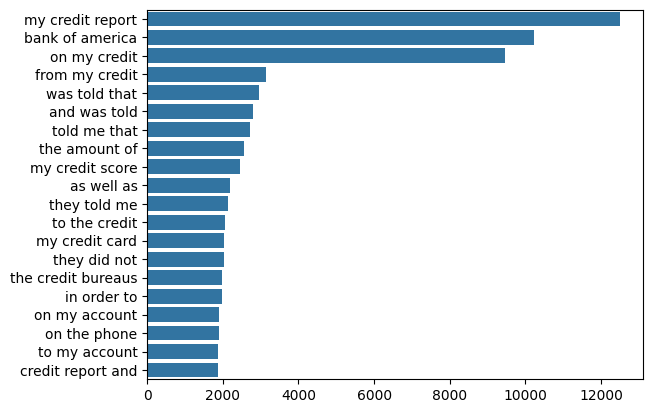

In [15]:
topn = get_top_ngram(df.review, 3, 20)
x, y = map(list, zip(*topn))
sns.barplot(x=y, y=x)

<Axes: ylabel='Frequency'>

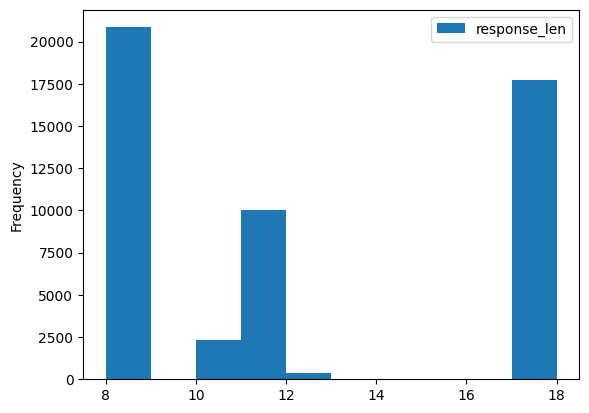

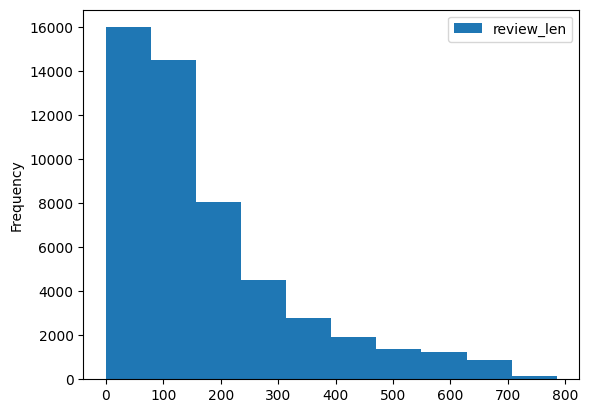

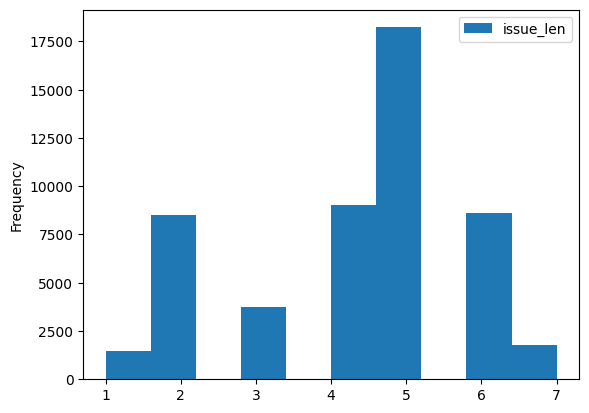

In [16]:
df.plot.hist(column=["response_len"])
df.plot.hist(column=["review_len"])
df.plot.hist(column=["issue_len"])

SENTIMENT ANALYSIS

In [17]:
sid = SentimentIntensityAnalyzer()

def compound_sentiment(x):
    polarity =  sid.polarity_scores(x)
    compound = polarity['compound']
    return compound

def discrete_sentiment(x):
    polarity =  sid.polarity_scores(x)
    compound = polarity['compound']
    if compound > 0: 
        return 1 # positive
    if compound < 0: 
        return -1 # negative
    else:
        return 0 # neutral

def disputed_map(x):
    if x == 'Yes': 
        return 1
    else:
        return 0
    
df['issue_sentiment'] = df.issue.apply(lambda text: discrete_sentiment(text))
df['review_sentiment'] = df.review.apply(lambda text: discrete_sentiment(text))
df['response_sentiment'] = df.response.apply(lambda text: discrete_sentiment(text))

df['issue_sentiment_compound'] = df.issue.apply(lambda text: compound_sentiment(text))
df['review_sentiment_compound'] = df.review.apply(lambda text: compound_sentiment(text))
df['response_sentiment_compound'] = df.response.apply(lambda text: compound_sentiment(text))

df['disputed_number'] = df.disputed.apply(lambda text: disputed_map(text))

In [18]:
print(df.groupby('review_sentiment').disputed.value_counts())
print(df.groupby('response_sentiment').disputed.value_counts())
print(df.groupby('issue_sentiment').disputed.value_counts())

review_sentiment  disputed
-1                No          19040
                  Yes          6556
 0                No           1274
                  Yes           224
 1                No          18440
                  Yes          5810
Name: count, dtype: int64
response_sentiment  disputed
-1                  No           2597
                    Yes           758
 0                  No          35084
                    Yes         11619
 1                  No           1073
                    Yes           213
Name: count, dtype: int64
issue_sentiment  disputed
-1               No           8622
                 Yes          3015
 0               No          18320
                 Yes          6522
 1               No          11812
                 Yes          3053
Name: count, dtype: int64


In [19]:
print(df.review_sentiment.value_counts())
print(df.review_sentiment_compound.value_counts())

review_sentiment
-1    25596
 1    24250
 0     1498
Name: count, dtype: int64
review_sentiment_compound
 0.0000    1498
 0.3818     813
-0.2960     587
-0.3612     296
 0.6369     284
           ... 
-0.0378       1
 0.6078       1
 0.8549       1
 0.5638       1
-0.0701       1
Name: count, Length: 10186, dtype: int64


In [20]:
print(df.response_sentiment.value_counts())
print(df.response_sentiment_compound.value_counts())

response_sentiment
 0    46703
-1     3355
 1     1286
Name: count, dtype: int64
response_sentiment_compound
 0.0000    46703
-0.5106     1015
-0.6124      942
 0.1280      907
-0.7351      815
-0.5994      566
 0.7579      379
-0.2960       17
Name: count, dtype: int64


In [21]:
print(df.issue_sentiment.value_counts())
print(df.issue_sentiment_compound.value_counts())

issue_sentiment
 0    24842
 1    14865
-1    11637
Name: count, dtype: int64
issue_sentiment_compound
 0.0000    24842
 0.3818    12946
-0.3612     7438
-0.5859     1388
-0.2732      992
 0.4215      809
-0.5574      786
-0.4767      672
 0.4767      299
 0.4588      257
 0.0258      203
 0.2960      193
-0.8176      173
 0.6486      158
-0.2755       78
-0.5994       46
-0.5106       39
-0.3182       21
-0.6705        4
Name: count, dtype: int64


ANALYSIS - Multi Discrete Sentiment Random Forest

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      7734
           1       0.30      0.23      0.26      2535

    accuracy                           0.68     10269
   macro avg       0.53      0.53      0.53     10269
weighted avg       0.65      0.68      0.66     10269

                  date  product  issue  review  response  state  source  \
disputed_number                                                           
0                38754    38754  38754   38754     38754  38638   38754   
1                12590    12590  12590   12590     12590  12541   12590   

                 disputed  issue_len  review_len  response_len  \
disputed_number                                                  
0                   38754      38754       38754         38754   
1                   12590      12590       12590         12590   

                 issue_sentiment  review_sentiment  response_sentiment  \
disputed_number                  

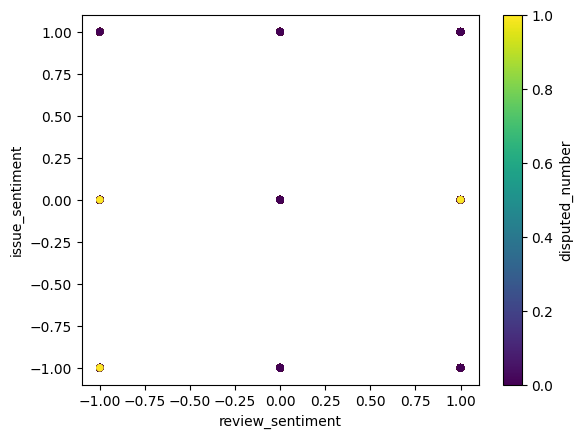

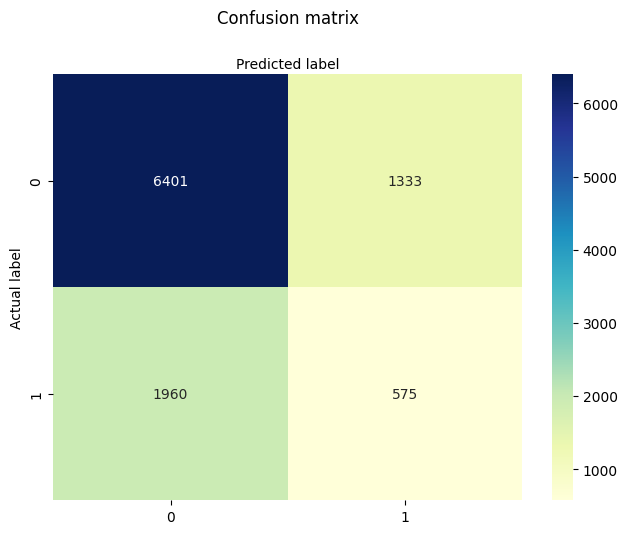

In [22]:
ax1 = df.plot.scatter(x='review_sentiment', y='issue_sentiment', c='disputed_number', colormap='viridis')

features = df.drop(
    [
        "date",
        "product",
        "issue",
        "review",
        "response",
        "state",
        "source",
        "disputed",
        "disputed_number",
        # "issue_len",
        # "review_len",
        # "response_len",
        "issue_sentiment_compound",
        "review_sentiment_compound",
        "response_sentiment_compound",
    ],
    axis=1,
)
labels = df["disputed_number"]

x_train, x_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=100
)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print(classification_report(y_test, y_pred))
zero_one_confusion_matrix(y_test, y_pred)

print(df.groupby('disputed_number').count())

ANALYSIS - Multi Discrete Sentiment Random Forest + SMOTE

              precision    recall  f1-score   support

           0       0.56      0.39      0.46      7710
           1       0.54      0.70      0.61      7792

    accuracy                           0.55     15502
   macro avg       0.55      0.54      0.53     15502
weighted avg       0.55      0.55      0.54     15502

                 issue_sentiment  review_sentiment  response_sentiment
disputed_number                                                       
0                          38754             38754               38754
1                          38754             38754               38754


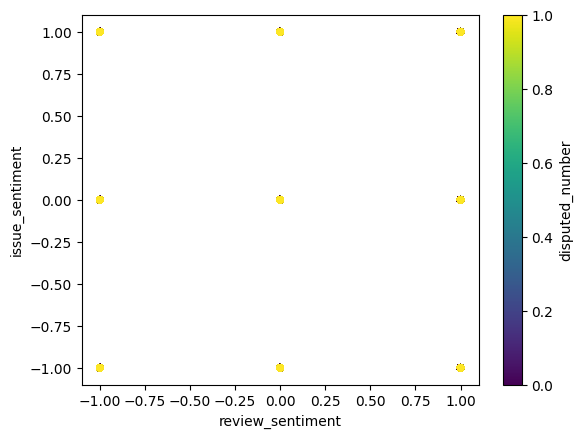

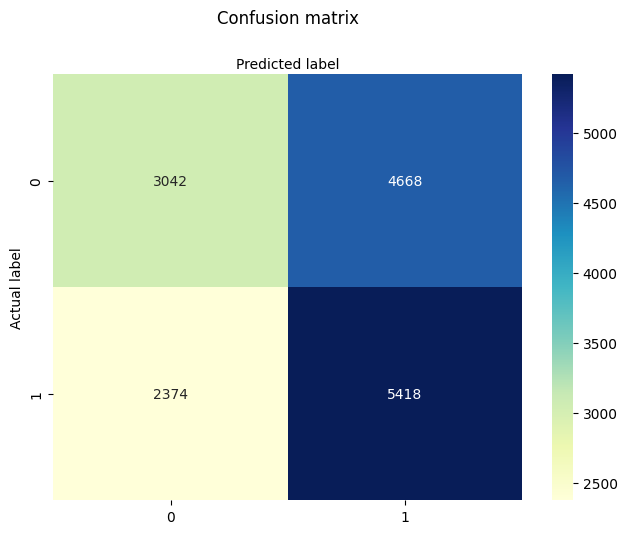

In [23]:
oversample = SMOTE()

features = df.drop(
    [
        "date",
        "product",
        "issue",
        "review",
        "response",
        "state",
        "source",
        "disputed",
        # "disputed_number",
        "issue_len",
        "review_len",
        "response_len",
        "issue_sentiment_compound",
        "review_sentiment_compound",
        "response_sentiment_compound",
    ],
    axis=1,
)
labels = df["disputed_number"]

features_oversampled, labels_oversampled = oversample.fit_resample(features, labels)

features = pd.DataFrame(features_oversampled, columns=features.columns)
labels = pd.DataFrame(labels_oversampled, columns=["disputed_number"])

ax1 = features.plot.scatter(
    x="review_sentiment",
    y="issue_sentiment",
    c="disputed_number",
    colormap="viridis",
)

features_training = features.drop(
    [
        "disputed_number",
    ],
    axis=1,
)

x_train, x_test, y_train, y_test = train_test_split(
    features_training, labels, test_size=0.2, random_state=100
)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print(classification_report(y_test, y_pred))
zero_one_confusion_matrix(y_test, y_pred)

print(features.groupby('disputed_number').count())

ANALYSIS - Multi Compound Sentiment Random Forest

              precision    recall  f1-score   support

           0       0.76      0.90      0.82      7734
           1       0.31      0.14      0.19      2535

    accuracy                           0.71     10269
   macro avg       0.54      0.52      0.51     10269
weighted avg       0.65      0.71      0.67     10269



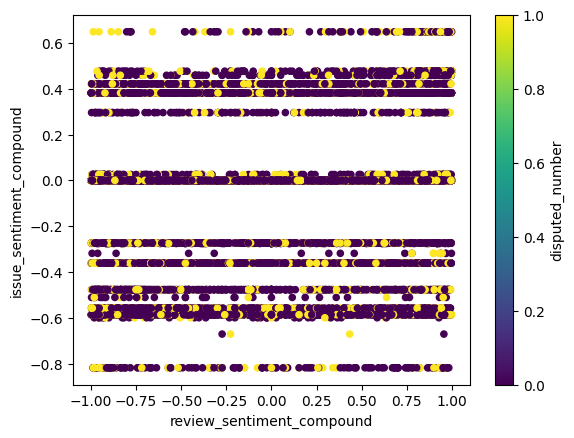

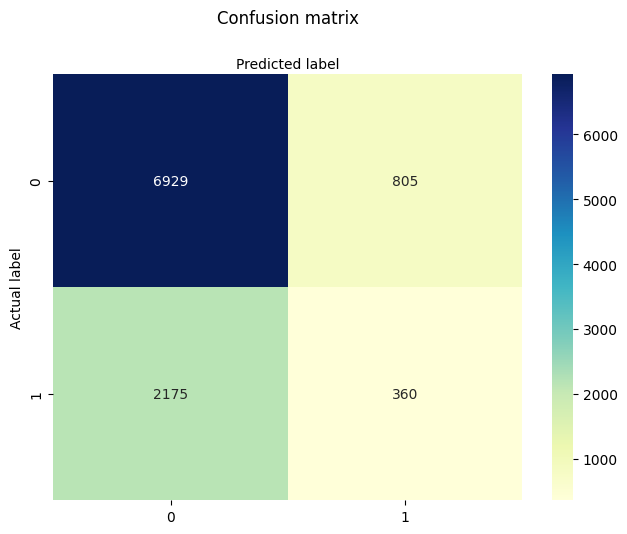

In [24]:
ax1 = df.plot.scatter(x='review_sentiment_compound', y='issue_sentiment_compound', c='disputed_number', colormap='viridis')

features = df.drop(
    [
        "date",
        "product",
        "issue",
        "review",
        "response",
        "state",
        "source",
        "disputed",
        "disputed_number",
        # "issue_len",
        # "review_len",
        # "response_len",
        "issue_sentiment",
        "review_sentiment",
        "response_sentiment",
    ],
    axis=1,
)
labels = df["disputed_number"]

x_train, x_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=100
)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print(classification_report(y_test, y_pred))
zero_one_confusion_matrix(y_test, y_pred)

ANALYSIS - Multi Compound Sentiment Random Forest + SMOTE (Synthetic Minority Over Sampling Technique)

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      7710
           1       0.76      0.70      0.73      7792

    accuracy                           0.74     15502
   macro avg       0.74      0.74      0.74     15502
weighted avg       0.74      0.74      0.74     15502

                 issue_len  review_len  response_len  \
disputed_number                                        
0                    38754       38754         38754   
1                    38754       38754         38754   

                 issue_sentiment_compound  review_sentiment_compound  \
disputed_number                                                        
0                                   38754                      38754   
1                                   38754                      38754   

                 response_sentiment_compound  
disputed_number                               
0                                      38754  
1                 

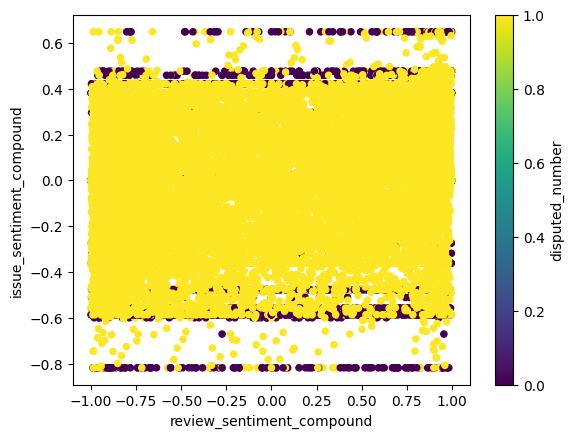

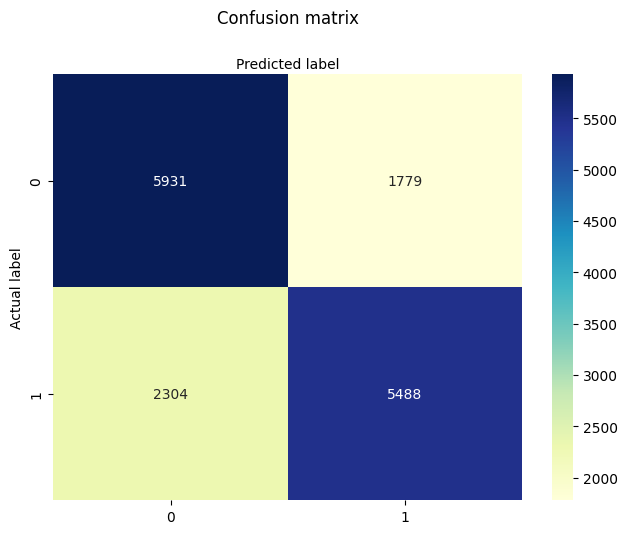

In [25]:
oversample = SMOTE()

features = df.drop(
    [
        "date",
        "product",
        "issue",
        "review",
        "response",
        "state",
        "source",
        "disputed",
        # "disputed_number",
        # "issue_len",
        # "review_len",
        # "response_len",
        "issue_sentiment",
        "review_sentiment",
        "response_sentiment",
    ],
    axis=1,
)
labels = df["disputed_number"]

features_oversampled, labels_oversampled = oversample.fit_resample(features, labels)

features = pd.DataFrame(features_oversampled, columns=features.columns)
labels = pd.DataFrame(labels_oversampled, columns=["disputed_number"])

ax1 = features.plot.scatter(
    x="review_sentiment_compound",
    y="issue_sentiment_compound",
    c="disputed_number",
    colormap="viridis",
)

features_training = features.drop(
    [
        "disputed_number",
    ],
    axis=1,
)

x_train, x_test, y_train, y_test = train_test_split(
    features_training, labels, test_size=0.2, random_state=100
)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print(classification_report(y_test, y_pred))
zero_one_confusion_matrix(y_test, y_pred)

print(features.groupby('disputed_number').count())

ANALYSIS - TFIDF SVM

              precision    recall  f1-score   support

           0       0.76      0.97      0.85      7734
           1       0.45      0.07      0.12      2535

    accuracy                           0.75     10269
   macro avg       0.60      0.52      0.48     10269
weighted avg       0.68      0.75      0.67     10269



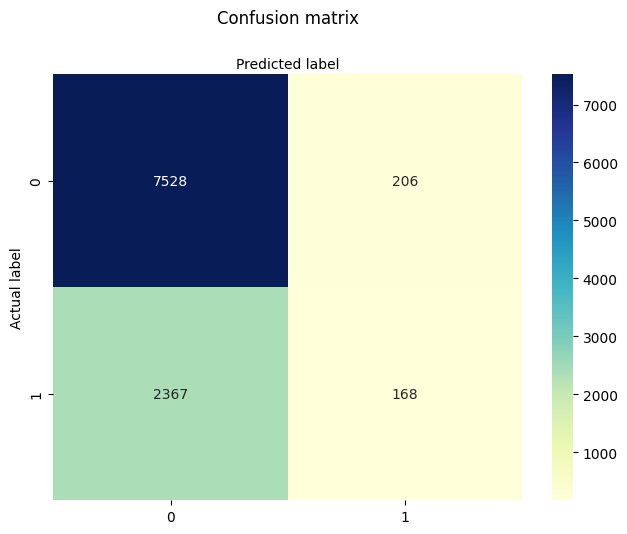

In [26]:
from sklearn.pipeline import Pipeline

review_vectorizer = TfidfVectorizer(
    tokenizer=tokenizeWithoutPunctuation,
    stop_words=english_stopwords,
    ngram_range=(1, 2),
    max_features=2000,
)

features = df["review"]
labels = df["disputed_number"]

x_train, x_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=100
)

# tfidf_pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])
tfidf_pipeline = Pipeline([('tfidf', review_vectorizer), ('clf', LinearSVC())])
tfidf_pipeline.fit(x_train, y_train)

y_pred = tfidf_pipeline.predict(x_test)

print(classification_report(y_test, y_pred))
zero_one_confusion_matrix(y_test, y_pred)

ANALYSIS - TFIDF SVM + SMOTE

              precision    recall  f1-score   support

           0       0.80      0.63      0.71      7734
           1       0.32      0.53      0.40      2535

    accuracy                           0.61     10269
   macro avg       0.56      0.58      0.55     10269
weighted avg       0.68      0.61      0.63     10269



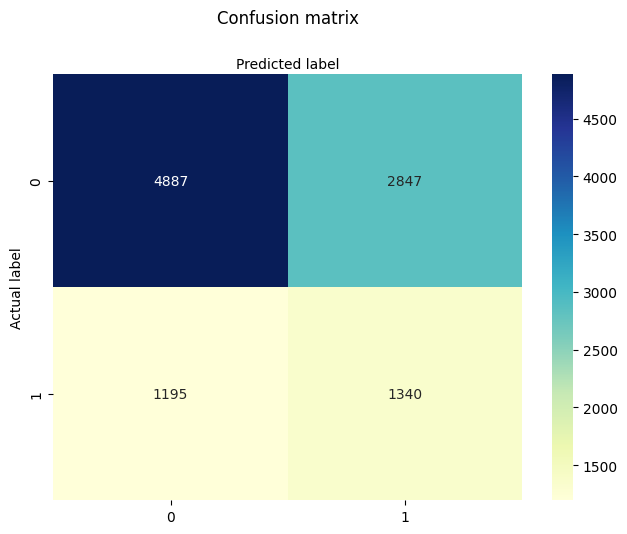

In [27]:
from imblearn.pipeline import Pipeline

oversample = SMOTE()

review_vectorizer = TfidfVectorizer(
    tokenizer=tokenizeWithoutPunctuation,
    stop_words=english_stopwords,
    ngram_range=(1, 2),
    max_features=2000,
)

features = df["review"]
labels = df["disputed_number"]

x_train, x_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=100
)

# tfidf_pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])
tfidf_pipeline = Pipeline(
    [
        ("tfidf", review_vectorizer),
        ("smote", SMOTE(random_state=12)),
        ("clf", LinearSVC()),
    ]
)
tfidf_pipeline.fit(x_train, y_train)

y_pred = tfidf_pipeline.predict(x_test)

print(classification_report(y_test, y_pred))
zero_one_confusion_matrix(y_test, y_pred)

MISC - Tabulating TFIDF Vector

In [28]:
review_vectorizer = TfidfVectorizer(
    tokenizer=tokenizeWithoutPunctuation,
    stop_words=english_stopwords,
    ngram_range=(1, 2),
    max_features=2000,
)
review_vectorizer.fit(df.review)
review_inputs = review_vectorizer.transform(df.review)

review_df = pd.DataFrame(review_inputs.todense(), index=df.index, columns=review_vectorizer.vocabulary_)
review_df.head()

,look,credit,report,saw,collect,account,doe,belong,allow,disput,...,c,exhibit,tree,green tree,greentre,synchroni,synchroni bank,ditech,aadvantag,citigold check
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.056301,0.0,0.126346,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.030065,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.030187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


MISC - Urgency Manual Search + Compound Sentiment Value

is_urgent  disputed
False      No          35261
           Yes         11352
True       No           3493
           Yes          1238
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.76      0.90      0.82      7734
           1       0.30      0.14      0.19      2535

    accuracy                           0.71     10269
   macro avg       0.53      0.52      0.50     10269
weighted avg       0.65      0.71      0.67     10269



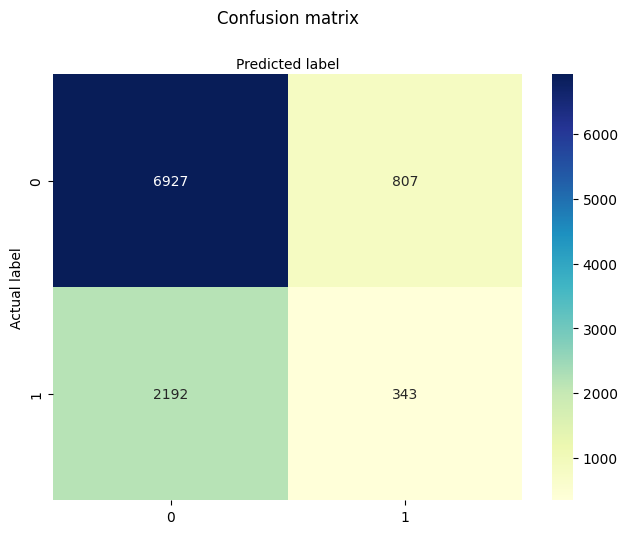

In [29]:
urgency_keywords = {"urgent", "immediately", "asap", "emergency"}

def has_urgent_keyword(x):
    tokens = {word.lower() for word in word_tokenize(x)}
    return bool(urgency_keywords.intersection(tokens))

df["is_urgent"] = df.review.apply(lambda x: has_urgent_keyword(x))

df.head()

features = df.drop(
    [
        "date",
        "product",
        "issue",
        "review",
        "response",
        "state",
        "source",
        "disputed",
        "disputed_number",
        # "issue_len",
        # "review_len",
        # "response_len",
        "issue_sentiment",
        "review_sentiment",
        "response_sentiment",
    ],
    axis=1,
)
labels = df["disputed_number"]

x_train, x_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=100
)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print(df.groupby('is_urgent').disputed.value_counts())
print(classification_report(y_test, y_pred))
zero_one_confusion_matrix(y_test, y_pred)

In [30]:
print(df.groupby('is_urgent').disputed.value_counts())

is_urgent  disputed
False      No          35261
           Yes         11352
True       No           3493
           Yes          1238
Name: count, dtype: int64


DEBUGGING

In [31]:
df.head()


# raw_df.head()
# df

# df.loc[df["disputed"] == 1]

# df2 = df.copy()
# df["review"].str.split()
# df2["has_not"] = df2.review.apply(lambda x: "not" in x.split())

# df2 = df2.loc[df2["has_not"] == False]
# df2

# for token in word_tokenize(df2.review[12]):


,date,product,issue,review,response,state,source,disputed,issue_len,review_len,response_len,issue_sentiment,review_sentiment,response_sentiment,issue_sentiment_compound,review_sentiment_compound,response_sentiment_compound,disputed_number,is_urgent
0,3/23/2015,Credit reporting,incorrect information on credit report,after looking at my credit report i saw a coll...,company chooses not to provide a public response,FL,Web,No,5,84,8,1,1,0,0.3818,0.8155,0.0,0,True
1,3/23/2015,Credit reporting,incorrect information on credit report,i had my purse stolen in they never found the ...,company chooses not to provide a public response,ME,Web,No,5,221,8,1,1,0,0.3818,0.8133,0.0,0,False
2,3/23/2015,Student loan,ca repay my loan,this is a continuation of a previous issue wit...,company chooses not to provide a public response,SC,Web,No,4,76,8,0,1,0,0.0000,0.8618,0.0,0,False
3,3/24/2015,Credit card,credit line,i receive an email from citibank regarding my ...,company chooses not to provide a public response,NV,Web,Yes,2,314,8,1,1,0,0.3818,0.9183,0.0,1,False
4,3/24/2015,Payday loan,ca stop charges to bank account,i took out a loan from cash central al for sen...,company chooses not to provide a public response,AL,Web,No,6,628,8,-1,-1,0,-0.5106,-0.9968,0.0,0,False


In [32]:
import tensorflow

# keras module for building LSTM 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

import tensorflow.keras.utils as ku 

# # set seeds for reproducability
# from tensorflow import set_random_seed
# from numpy.random import seed
# set_random_seed(2)
# seed(1)

import pandas as pd
import numpy as np
import string, os 

# import warnings
# warnings.filterwarnings("ignore")
# warnings.simplefilter(action='ignore', category=FutureWarning)


In [39]:

max_fatures = 2000
embed_dim = 128
lstm_out = 196

tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['review'].values)
X = tokenizer.texts_to_sequences(df['review'].values)
X = pad_sequences(X)

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [40]:
Y = pd.get_dummies(df["disputed_number"]).values

x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=100
)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

batch_size = 32
model.fit(x_train, y_train, epochs = 7, batch_size=batch_size, verbose = 2)

y_pred = model.predict(x_test, batch_size=1, verbose = 2)[0]

print(classification_report(y_test, y_pred))
zero_one_confusion_matrix(y_test, y_pred)

(41075, 766) (41075, 2)
(10269, 766) (10269, 2)
Epoch 1/7
1284/1284 - 548s - 427ms/step - accuracy: 0.7552 - loss: 0.5545
Epoch 2/7


KeyboardInterrupt: 